In [14]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

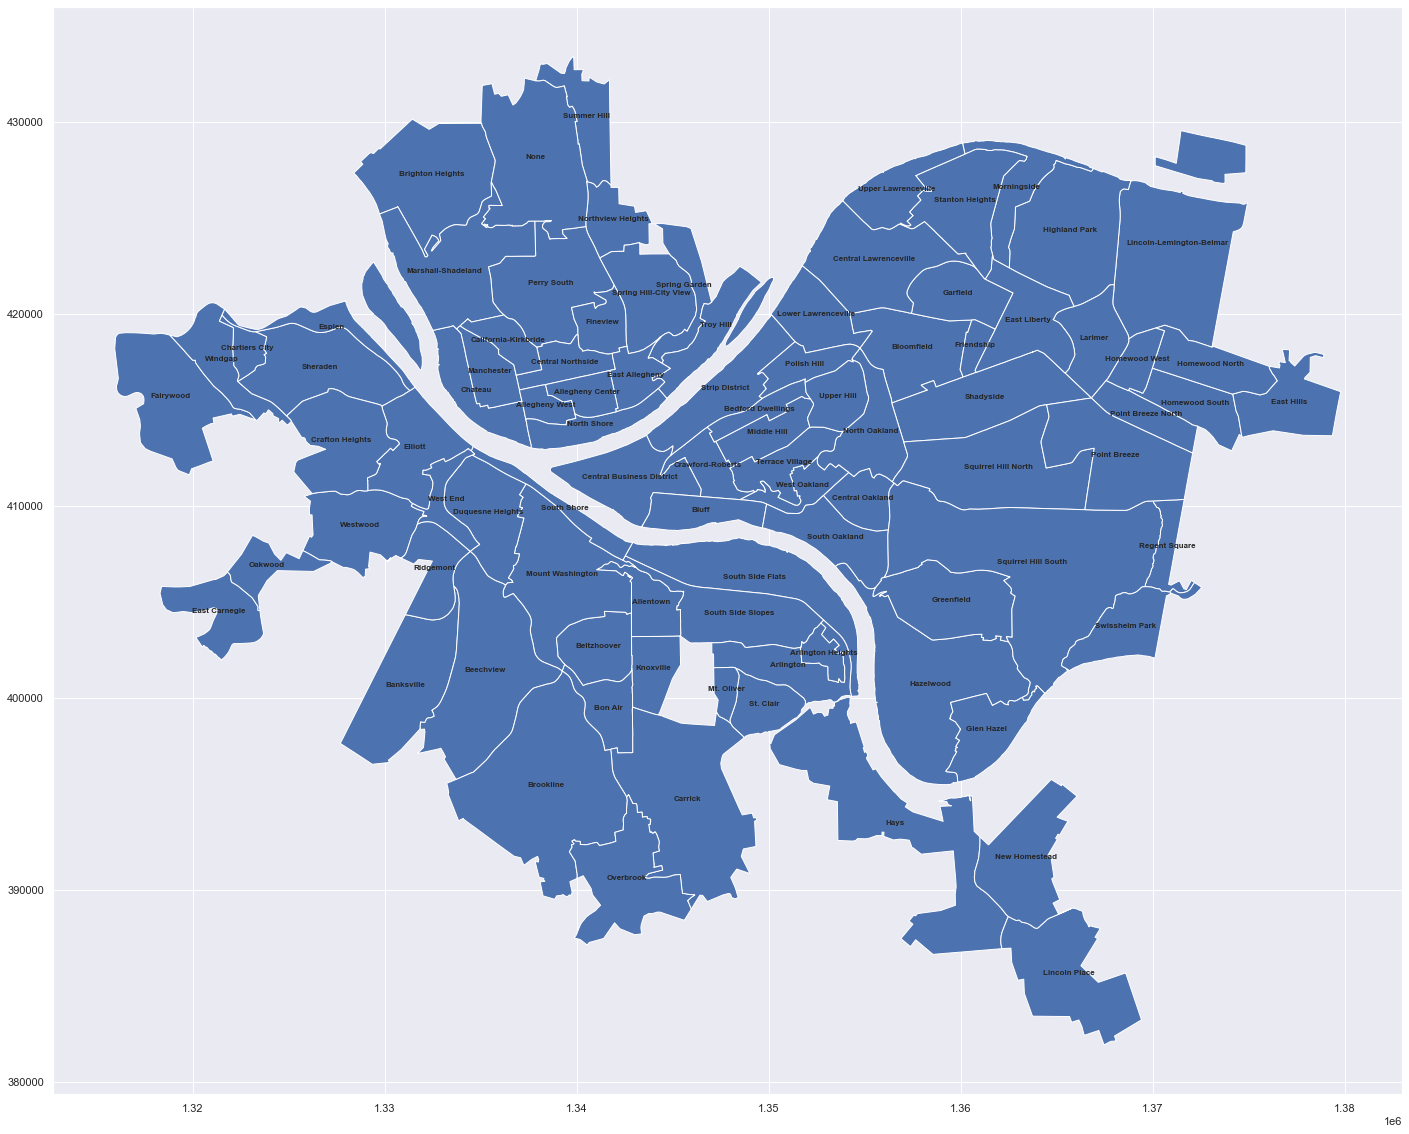

In [15]:
nb = 'Neighborhoods/Neighborhoods_.shp'
regions = gpd.read_file(nb)

neighborhoods = pd.read_csv("Neighborhoods_.csv")
data = pd.read_csv("PittsburghDemo.csv")

names = []
counts = []
for i in range(0,len(regions['geoid10'])):
    geoid = regions["geoid10"][i]
    if type(geoid) == str:
        item = neighborhoods.loc[neighborhoods['geoid10']==geoid,"hood"]
        n = item[i]
        names.append(n)
        
        count = data.loc[data["Neighborhood"] == n, "Estimate; Total: - American Indian and Alaska Native alone"].values
        count1 = data.loc[data["Neighborhood"] == n, "Estimate; Total: - Asian alone"].values
        count2 = data.loc[data["Neighborhood"] == n, "Estimate; Total: - Native Hawaiian and Other Pacific Islander a"].values
        count3 = data.loc[data["Neighborhood"] == n, "Estimate; Total: - Some other race alone"].values
        try:
            count = list(count)
            count1 = list(count1)
            count2 = list(count2)
            count3 = list(count3)
            counts.append(count[0]+count1[0]+count2[0]+count3[0])
        except:
            counts.append(-1)

    else:
        names.append(None)
        counts.append(None)
        
        
regions['coords'] = regions['geometry'].apply(lambda x: x.centroid.coords[:])
regions['coords'] = [coords[0] for coords in regions['coords']]

regions.sample(5)

regions.insert(len(regions.columns), "neighborhood", names, allow_duplicates=False)
regions.insert(len(regions.columns), "count", counts, allow_duplicates=False)

ax = regions.plot(figsize=(40,20))

for i in range(len(regions["neighborhood"])):
    plt.text(regions.coords[i][0],regions.coords[i][1],"{}".format(regions.neighborhood[i]),horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})

#regions.apply(lambda x: ax.annotate(s=regions.neighborhood, xy=regions.geometry.centroid.x, ha='center'),axis=1);
    
#for coor, label in zip(regions.coords, regions.neighborhood):
#    ax.annotate(label, xy=(coor[0], coor[1]), xytext=(3, 3), textcoords="offset points")

plt.show()

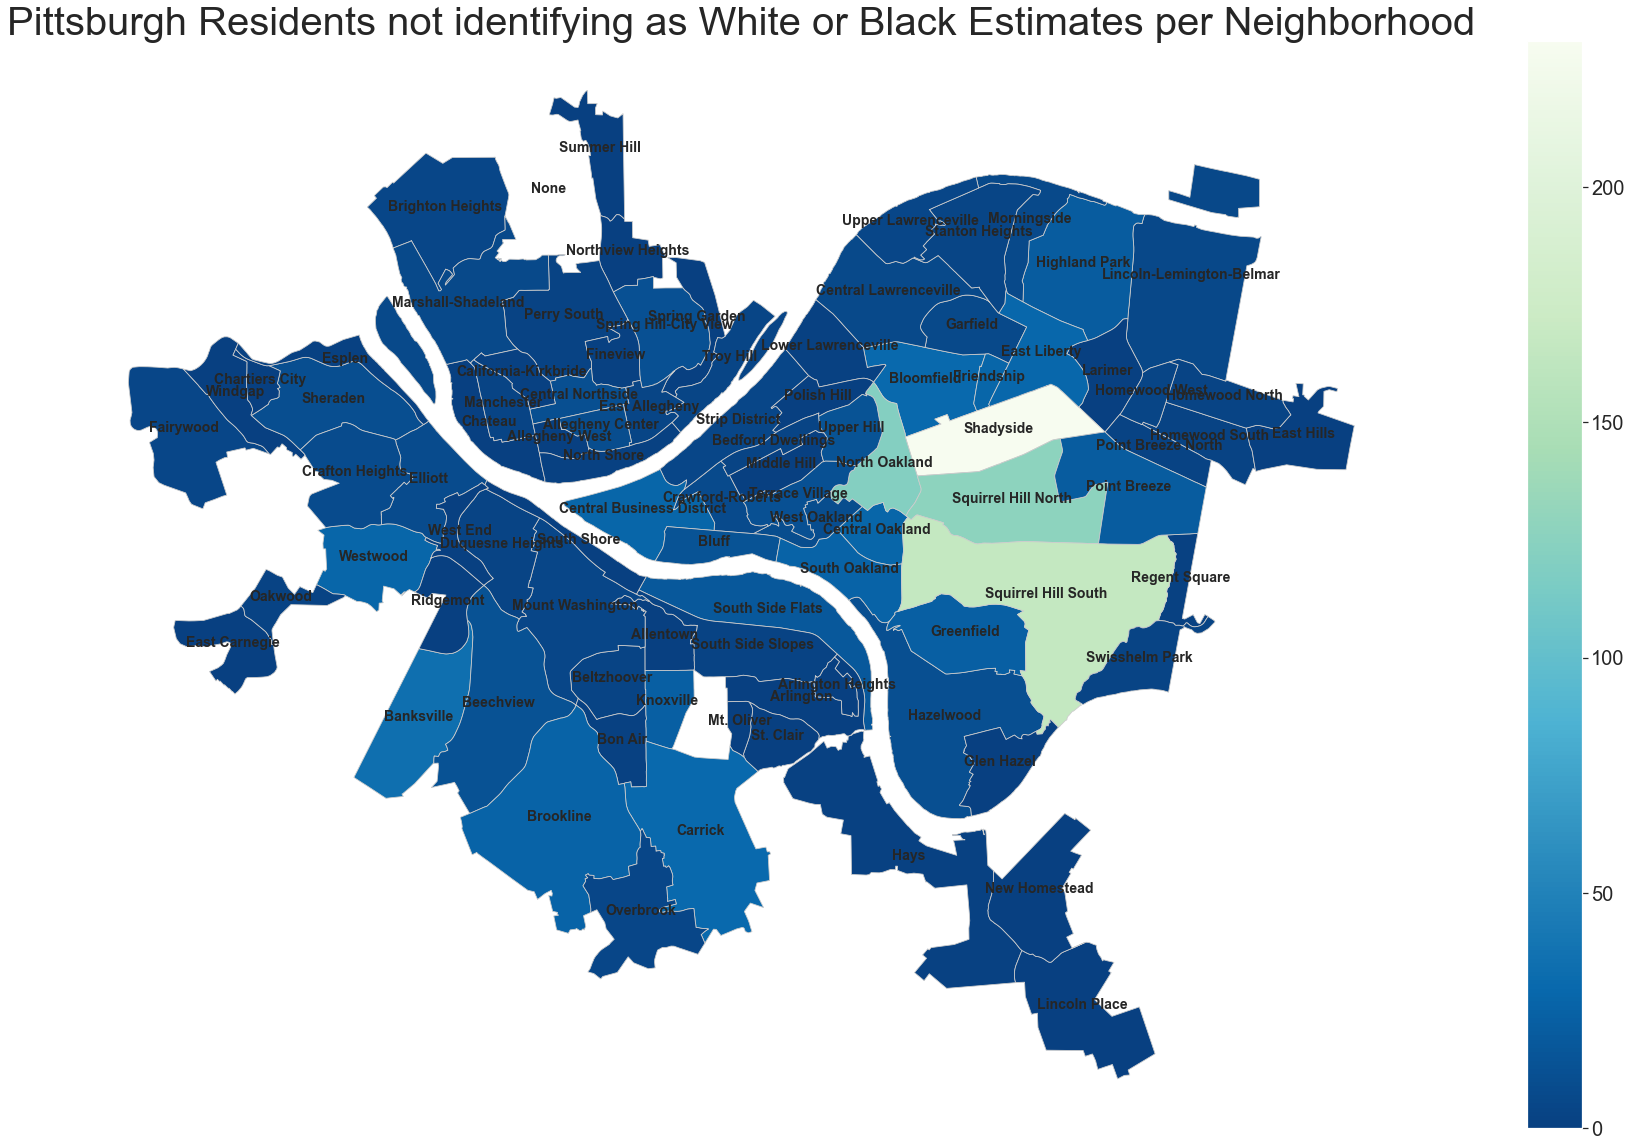

In [17]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Pittsburgh Residents not identifying as White or Black Estimates per Neighborhood', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'GnBu_r'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

#plt.figure()
plot = regions.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for i in range(len(regions["neighborhood"])):
    plt.text(regions.coords[i][0],regions.coords[i][1],"{}".format(regions.neighborhood[i]),horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 14})
fig = plot.get_figure()
fig.savefig("Other.png", dpi=fig.dpi,transparent=True)
